# Web Scraping eBay's Financial Data on Wikipedia and performing Exploratory Data Analaysis with Plotly! 
### URL -> https://en.wikipedia.org/wiki/EBay  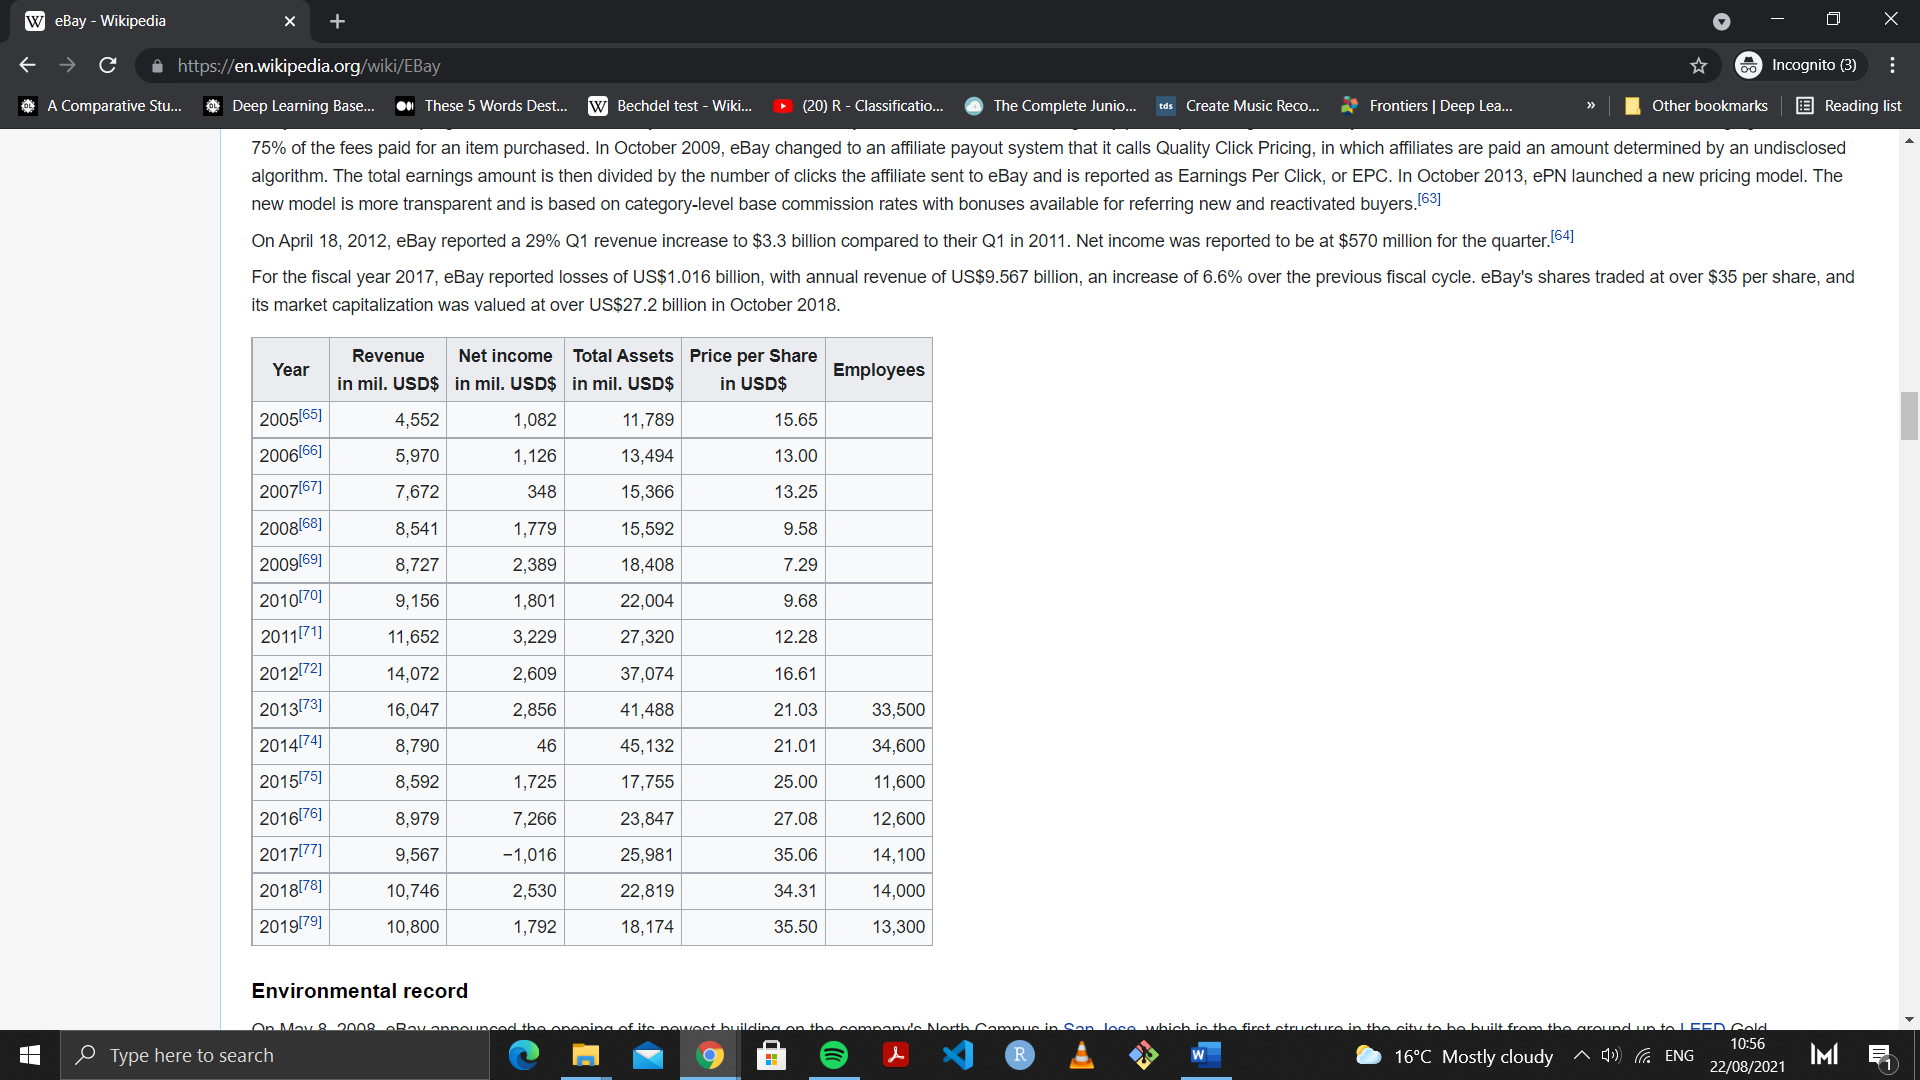

**Install Beautifulsoup4 and Plotly Express**

In [1]:
!pip install beautifulsoup4
!pip install plotly.express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)


**Importing Libraries**

In [2]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import plotly.io as pio

In [3]:
url = 'https://en.wikipedia.org/wiki/EBay'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')

#### Preview Scraped Content

In [4]:
#print(soup.prettify())

#### Select the desired table from the webpage

In [5]:
table = soup.find('table',{'class':'wikitable float-left'})

#### View Table Source Code

In [6]:
#table

**Checking the number of columns in the table**

In [7]:
for column in table.findAll("tr"):
    cells = column.findAll('td')

len(cells)

6

**Checking the number of rows in the table**

In [8]:
rows = table.findAll("tr")
len(rows)

16

#### Appending the data in the table to their respective columns

In [9]:
column1 = []
column2 = []
column3 = []
column4 = []
column5 = []
column6 = []

for row in table.findAll("tr"):
  cells = row.findAll("td")
  if len(cells) == 6:
    column1.append(cells[0].find(text=True))
    column2.append(cells[1].find(text=True))
    column3.append(cells[2].find(text=True))
    column4.append(cells[3].find(text=True))
    column5.append(cells[4].find(text=True))
    column6.append(cells[5].find(text=True))

#### Creating Pandas Dataframe

In [10]:
ebay_data = pd.DataFrame({'Year': column1,
                   'Revenue in Mil. USD$': column2,
                   'Net Income in Mil. USD$': column3,
                   'Total Assets in Mil. USD$': column4,
                   'Price Per Share in USD$': column5,
                   'Employees': column6})

ebay_data.head(15)

,Year,Revenue in Mil. USD$,Net Income in Mil. USD$,Total Assets in Mil. USD$,Price Per Share in USD$,Employees
0,2005,"4,552\n","1,082\n","11,789\n",15.65\n,\n
1,2006,"5,970\n","1,126\n","13,494\n",13.00\n,\n
2,2007,"7,672\n",348\n,"15,366\n",13.25\n,\n
3,2008,"8,541\n","1,779\n","15,592\n",9.58\n,\n
4,2009,"8,727\n","2,389\n","18,408\n",7.29\n,\n
5,2010,"9,156\n","1,801\n","22,004\n",9.68\n,\n
6,2011,"11,652\n","3,229\n","27,320\n",12.28\n,\n
7,2012,"14,072\n","2,609\n","37,074\n",16.61\n,\n
8,2013,"16,047\n","2,856\n","41,488\n",21.03\n,"33,500\n"
9,2014,"8,790\n",46\n,"45,132\n",21.01\n,"34,600\n"


#### Cleaning the Data

In [11]:
ebay_data = ebay_data.replace(r'\n','', regex=True)
ebay_data = ebay_data.replace(',', '', regex=True)
ebay_data = ebay_data.replace("−", "-", regex=True)
ebay_data = ebay_data.replace(r'^\s*$', np.nan, regex=True)

In [12]:
ebay_data.head(15)

,Year,Revenue in Mil. USD$,Net Income in Mil. USD$,Total Assets in Mil. USD$,Price Per Share in USD$,Employees
0,2005,4552,1082,11789,15.65,NaN
1,2006,5970,1126,13494,13.00,NaN
2,2007,7672,348,15366,13.25,NaN
3,2008,8541,1779,15592,9.58,NaN
4,2009,8727,2389,18408,7.29,NaN
5,2010,9156,1801,22004,9.68,NaN
6,2011,11652,3229,27320,12.28,NaN
7,2012,14072,2609,37074,16.61,NaN
8,2013,16047,2856,41488,21.03,33500
9,2014,8790,46,45132,21.01,34600


#### Exploratory Data Analysis

#### Checking the Attributes in the Data and their Data Types

In [13]:
ebay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       15 non-null     object
 1   Revenue in Mil. USD$       15 non-null     object
 2   Net Income in Mil. USD$    15 non-null     object
 3   Total Assets in Mil. USD$  15 non-null     object
 4   Price Per Share in USD$    15 non-null     object
 5   Employees                  7 non-null      object
dtypes: object(6)
memory usage: 848.0+ bytes


#### Converting the Atttribute in the Data from Object to Float

In [14]:
ebay_data = ebay_data.astype(float)

#### **Visualizations**

#### Line Graph

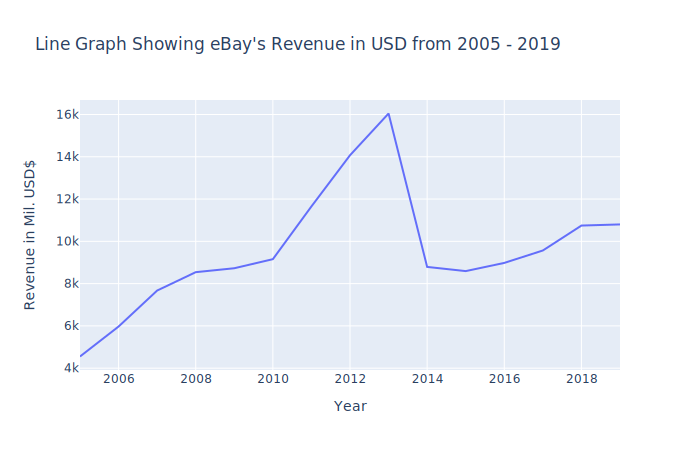

In [15]:
pio.renderers.default = "svg"
fig = px.line(ebay_data, x="Year", y="Revenue in Mil. USD$", title="Line Graph Showing eBay\'s Revenue in USD from 2005 - 2019")
fig.show()

#### Scatter Plot

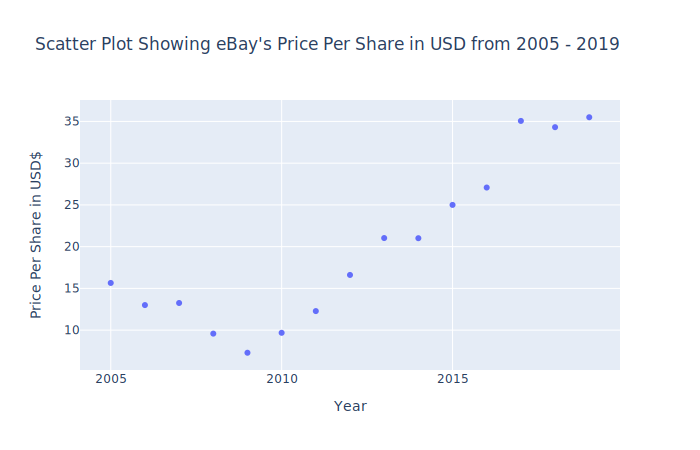

In [16]:
fig = px.scatter(ebay_data, x='Year', y='Price Per Share in USD$',
                 title="Scatter Plot Showing eBay\'s Price Per Share in USD from 2005 - 2019"
                )

fig.show()

#### Bar Chart

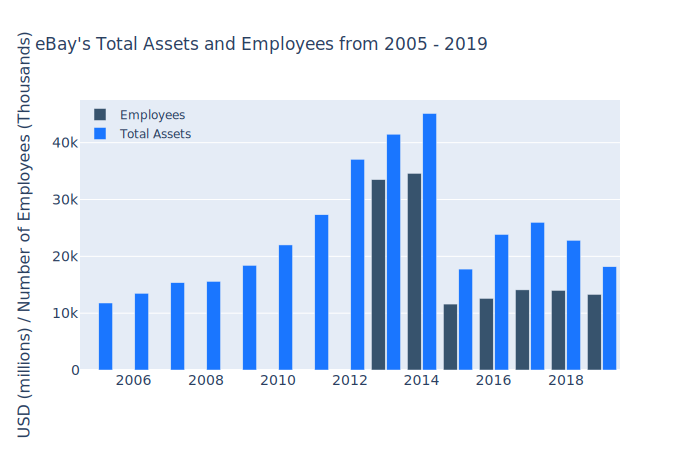

In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(x=ebay_data['Year'], y=ebay_data['Employees'],
                name='Employees',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=ebay_data['Year'], y=ebay_data['Total Assets in Mil. USD$'],
                name='Total Assets',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='eBay\'s Total Assets and Employees from 2005 - 2019',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='USD (millions) / Number of Employees (Thousands)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

#### Relative Bar Chart

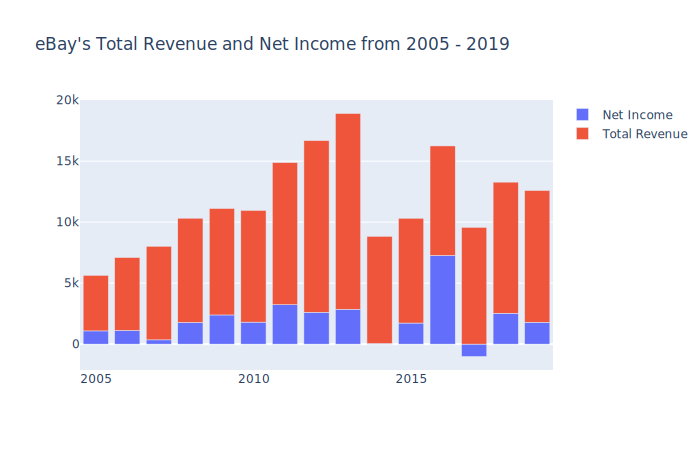

In [18]:
fig = go.Figure()
fig.add_trace(go.Bar(x=ebay_data['Year'], y=ebay_data['Net Income in Mil. USD$'], name='Net Income'))
fig.add_trace(go.Bar(x=ebay_data['Year'], y=ebay_data['Revenue in Mil. USD$'], name='Total Revenue'))

fig.update_layout(barmode='relative', title_text='eBay\'s Total Revenue and Net Income from 2005 - 2019')
fig.show()

#### Saving Cleaned Data

In [19]:
ebay_data.to_csv('eBay.csv')